## data from January 1, 2019, to December 31, 2023

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [ ]:
df = pd.read_csv("AAPL.csv")

In [ ]:
df2 = df.drop(["Open",'High', 'Low','Volume'], axis=1)

In [ ]:
df2 = df2.rename(columns={'Close': 'price'})
df2

,Date,price
0,2019-01-02,39.48
1,2019-01-03,35.55
2,2019-01-04,37.07
3,2019-01-07,36.98
4,2019-01-08,37.69
...,...,...
1253,2023-12-22,193.60
1254,2023-12-26,193.05
1255,2023-12-27,193.15
1256,2023-12-28,193.58


In [ ]:
data = df2.set_index('Date')
data

,price
Date,
2019-01-02,39.48
2019-01-03,35.55
2019-01-04,37.07
2019-01-07,36.98
2019-01-08,37.69
...,...
2023-12-22,193.60
2023-12-26,193.05
2023-12-27,193.15


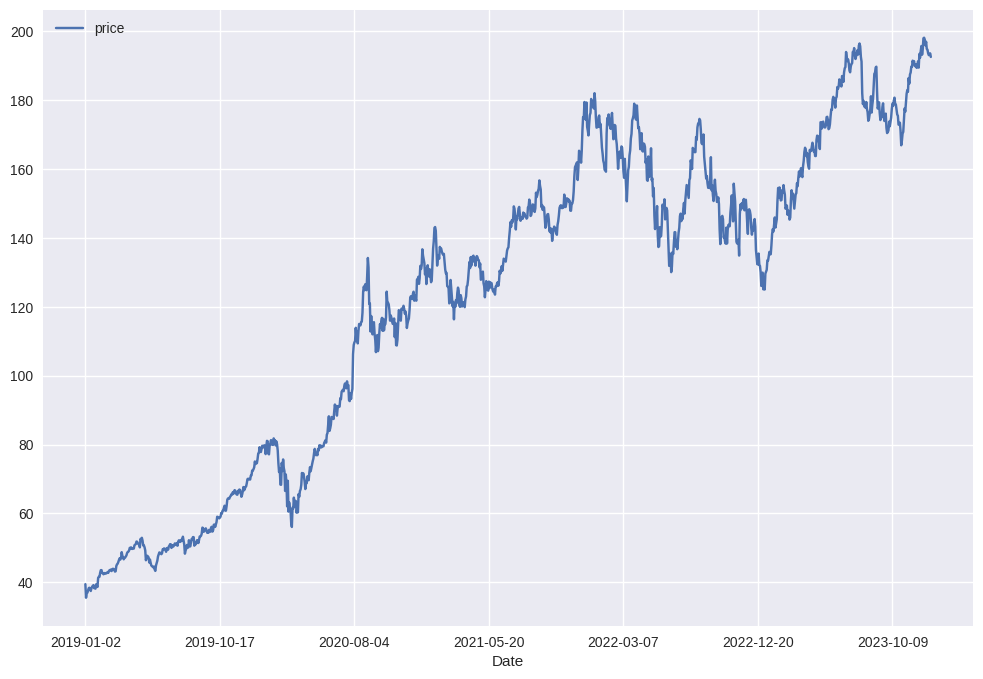

In [ ]:
data.plot(figsize = (12, 8))
plt.show()

In [ ]:
data["returns"] = np.log(data.div(data.shift(1)))
data

,price,returns
Date,,
2019-01-02,39.48,NaN
2019-01-03,35.55,-0.104854
2019-01-04,37.07,0.041868
2019-01-07,36.98,-0.002431
2019-01-08,37.69,0.019018
...,...,...
2023-12-22,193.60,-0.005563
2023-12-26,193.05,-0.002845
2023-12-27,193.15,0.000518


In [ ]:
SMA = 30
dev = 2

In [ ]:
data["SMA"] = data["price"].rolling(SMA).mean()

In [ ]:
data["price"].rolling(SMA).std()

,price
Date,
2019-01-02,NaN
2019-01-03,NaN
2019-01-04,NaN
2019-01-07,NaN
2019-01-08,NaN
...,...
2023-12-22,3.492195
2023-12-26,3.325445
2023-12-27,3.009195


In [ ]:
data["Lower"] = data["SMA"] - data["price"].rolling(SMA).std() * dev # Lower Band -2 Std Dev
data["Upper"] = data["SMA"] + data["price"].rolling(SMA).std() * dev # Upper Band -2 Std Dev

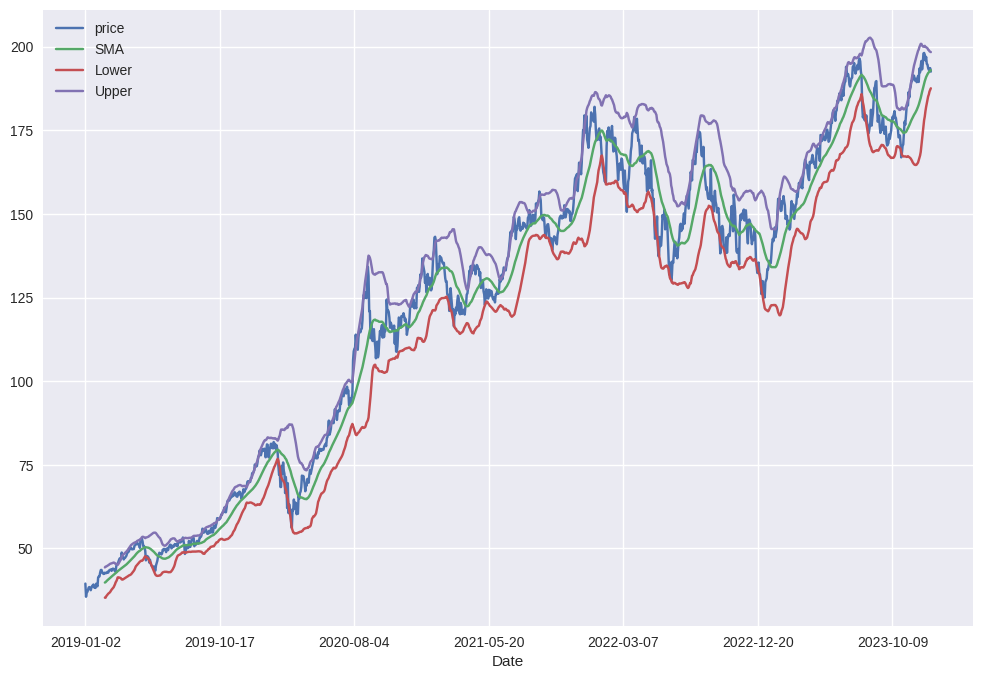

In [ ]:
data.drop(columns = "returns").plot(figsize = (12, 8))
plt.show()

In [ ]:
data.dropna(inplace = True)
data

,price,returns,SMA,Lower,Upper
Date,,,,,
2019-02-13,42.55,-0.003987,39.797667,35.271361,44.323972
2019-02-14,42.70,0.003519,39.905000,35.258742,44.551258
2019-02-15,42.61,-0.002110,40.140333,35.696034,44.584632
2019-02-19,42.73,0.002812,40.329000,35.943883,44.714117
2019-02-20,43.01,0.006531,40.530000,36.228084,44.831916
...,...,...,...,...,...
2023-12-22,193.60,-0.005563,192.093000,185.108609,199.077391
2023-12-26,193.05,-0.002845,192.314667,185.663777,198.965557
2023-12-27,193.15,0.000518,192.593000,186.574609,198.611391


In [ ]:
data["distance"] = data.price - data.SMA # helper Column
data["position"] = np.where(data.price < data.Lower, 1, np.nan) # 1. oversold -> go long
data["position"] = np.where(data.price > data.Upper, -1, data["position"]) # 2. overbought -> go short
data["position"] = np.where(data.distance * data.distance.shift(1) < 0, 0, data["position"])
data["position"] = data.position.ffill().fillna(0) # where 1-3 isn´t applicable -> hold previous position

In [ ]:
data.position.value_counts()

,count
position,
-1.0,546
0.0,485
1.0,198


In [ ]:
data

,price,returns,SMA,Lower,Upper,distance,position
Date,,,,,,,
2019-02-13,42.55,-0.003987,39.797667,35.271361,44.323972,2.752333,0.0
2019-02-14,42.70,0.003519,39.905000,35.258742,44.551258,2.795000,0.0
2019-02-15,42.61,-0.002110,40.140333,35.696034,44.584632,2.469667,0.0
2019-02-19,42.73,0.002812,40.329000,35.943883,44.714117,2.401000,0.0
2019-02-20,43.01,0.006531,40.530000,36.228084,44.831916,2.480000,0.0
...,...,...,...,...,...,...,...
2023-12-22,193.60,-0.005563,192.093000,185.108609,199.077391,1.507000,-1.0
2023-12-26,193.05,-0.002845,192.314667,185.663777,198.965557,0.735333,-1.0
2023-12-27,193.15,0.000518,192.593000,186.574609,198.611391,0.557000,-1.0


In [ ]:
data["strategy"] = data.position.shift(1) * data["returns"]
data.dropna(inplace = True)
data

,price,returns,SMA,Lower,Upper,distance,position,strategy
Date,,,,,,,,
2019-02-14,42.70,0.003519,39.905000,35.258742,44.551258,2.795000,0.0,0.000000
2019-02-15,42.61,-0.002110,40.140333,35.696034,44.584632,2.469667,0.0,-0.000000
2019-02-19,42.73,0.002812,40.329000,35.943883,44.714117,2.401000,0.0,0.000000
2019-02-20,43.01,0.006531,40.530000,36.228084,44.831916,2.480000,0.0,0.000000
2019-02-21,42.77,-0.005596,40.699333,36.460534,44.938133,2.070667,0.0,-0.000000
...,...,...,...,...,...,...,...,...
2023-12-22,193.60,-0.005563,192.093000,185.108609,199.077391,1.507000,-1.0,0.005563
2023-12-26,193.05,-0.002845,192.314667,185.663777,198.965557,0.735333,-1.0,0.002845
2023-12-27,193.15,0.000518,192.593000,186.574609,198.611391,0.557000,-1.0,-0.000518


In [ ]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

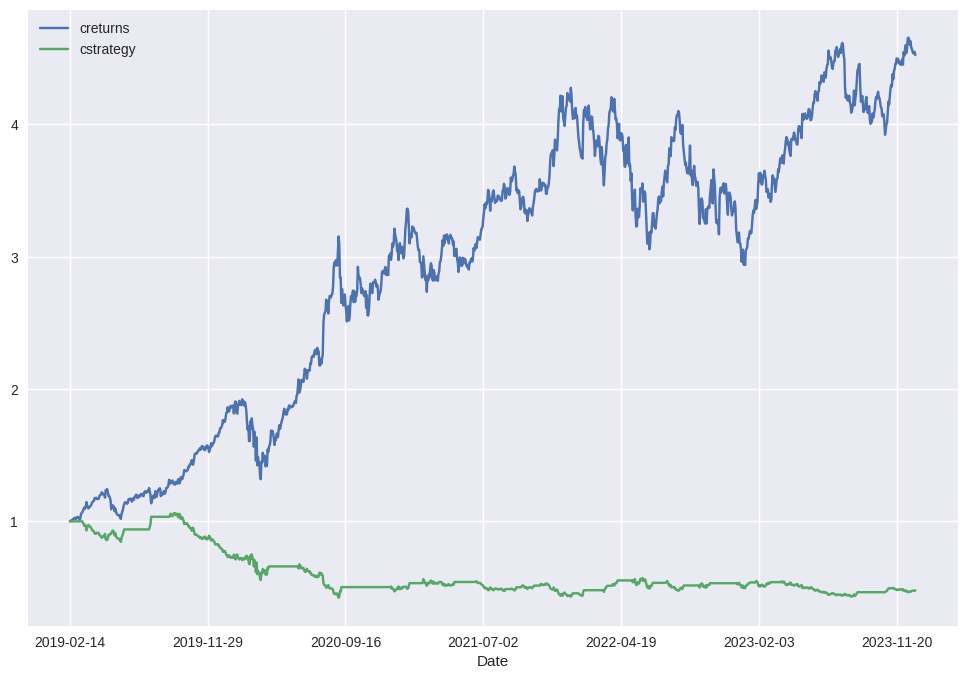

In [ ]:
data[["creturns", "cstrategy"]].plot(figsize = (12 , 8))
plt.show()

In [ ]:
data

,price,returns,SMA,Lower,Upper,distance,position,strategy,creturns,cstrategy
Date,,,,,,,,,,
2019-02-14,42.70,0.003519,39.905000,35.258742,44.551258,2.795000,0.0,0.000000,1.003525,1.000000
2019-02-15,42.61,-0.002110,40.140333,35.696034,44.584632,2.469667,0.0,-0.000000,1.001410,1.000000
2019-02-19,42.73,0.002812,40.329000,35.943883,44.714117,2.401000,0.0,0.000000,1.004230,1.000000
2019-02-20,43.01,0.006531,40.530000,36.228084,44.831916,2.480000,0.0,0.000000,1.010811,1.000000
2019-02-21,42.77,-0.005596,40.699333,36.460534,44.938133,2.070667,0.0,-0.000000,1.005170,1.000000
...,...,...,...,...,...,...,...,...,...,...
2023-12-22,193.60,-0.005563,192.093000,185.108609,199.077391,1.507000,-1.0,0.005563,4.549941,0.475538
2023-12-26,193.05,-0.002845,192.314667,185.663777,198.965557,0.735333,-1.0,0.002845,4.537015,0.476893
2023-12-27,193.15,0.000518,192.593000,186.574609,198.611391,0.557000,-1.0,-0.000518,4.539365,0.476646


## Optimize the parameters

In [ ]:
import numpy as np
import pandas as pd

def bollinger_bands_strategy(df, SMA, dev):
    # Rename the column
    df = df.rename(columns={'Close': 'price'})
    # Set index
    data = df.set_index('Date')

    # Calculate returns
    data["returns"] = np.log(data["price"] / data["price"].shift(1))

    # Calculate Bollinger Bands
    data["SMA"] = data["price"].rolling(SMA).mean()
    data["std"] = data["price"].rolling(SMA).std()
    data["Lower"] = data["SMA"] - (data["std"] * dev)
    data["Upper"] = data["SMA"] + (data["std"] * dev)
    data.dropna(inplace=True)

    # Define positions
    data["distance"] = data["price"] - data["SMA"]
    data["position"] = np.where(data["price"] < data["Lower"], 1, np.nan)
    data["position"] = np.where(data["price"] > data["Upper"], -1, data["position"])
    data["position"] = np.where(data["distance"] * data["distance"].shift(1) < 0, 0, data["position"])
    data["position"] = data["position"].ffill().fillna(0)
    data["strategy"] = data["position"].shift(1) * data["returns"]
    data.dropna(inplace=True)

    # Calculate cumulative returns
    data["creturns"] = data["returns"].cumsum().apply(np.exp)
    data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

    return data["cstrategy"].iloc[-1]  # Return the last value of cumulative strategy returns


In [ ]:
# Define ranges for optimization
sma_range = range(10, 61, 5)  # From 10 to 60 with a step of 5
dev_range = np.arange(1, 4, 0.5)  # From 1 to 3 with a step of 0.5

best_return = -np.inf
best_params = (None, None)
results = []

# Perform grid search
for sma in sma_range:
    for dev in dev_range:
        cstrategy_return = bollinger_bands_strategy(df2, sma, dev)
        results.append((sma, dev, cstrategy_return))

        if cstrategy_return > best_return:
            best_return = cstrategy_return
            best_params = (sma, dev)

print(f"Best SMA: {best_params[0]}, Best dev: {best_params[1]}, Best Cumulative Return: {best_return}")

Best SMA: 55, Best dev: 2.5, Best Cumulative Return: 1.3006678080817853


## Return (01/01/2024 - 30/09/2024)

In [ ]:
df = pd.read_csv("2024 AAPL.csv")
df2 = df.drop(["Open",'High', 'Low','Volume'], axis=1)
df2 = df2.rename(columns={'Close': 'price'})
df2

,Date,price
0,2024-01-02,185.64
1,2024-01-03,184.25
2,2024-01-04,181.91
3,2024-01-05,181.18
4,2024-01-08,185.56
...,...,...
183,2024-09-24,227.37
184,2024-09-25,226.37
185,2024-09-26,227.52
186,2024-09-27,227.79


In [ ]:
data = df2.set_index('Date')
data

,price
Date,
2024-01-02,185.64
2024-01-03,184.25
2024-01-04,181.91
2024-01-05,181.18
2024-01-08,185.56
...,...
2024-09-24,227.37
2024-09-25,226.37
2024-09-26,227.52


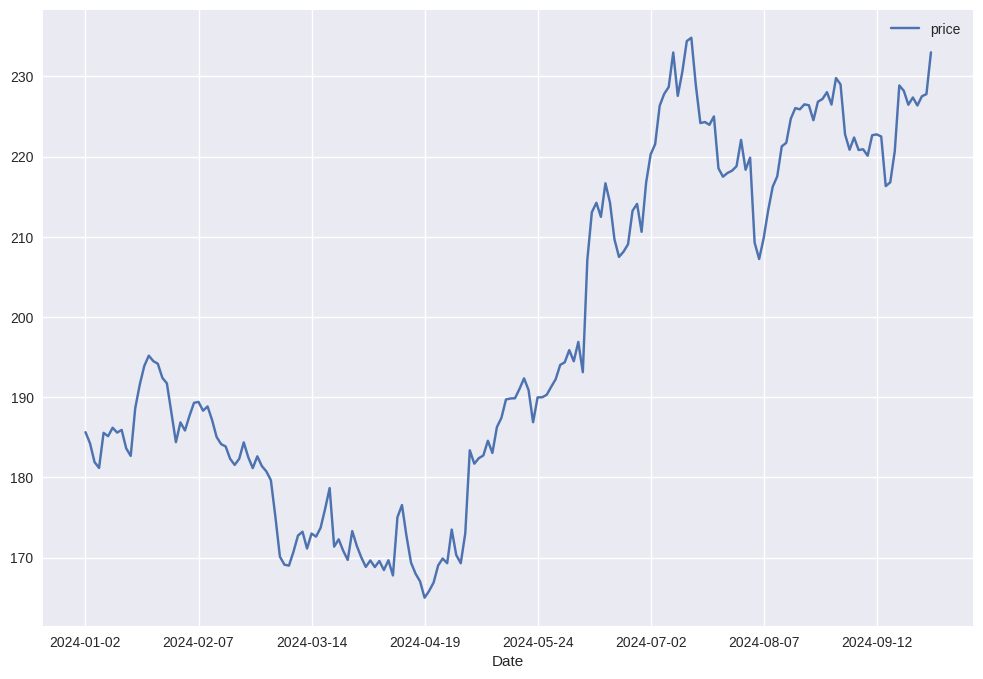

In [ ]:
data.plot(figsize = (12, 8))
plt.show()

In [ ]:
data["returns"] = np.log(data.div(data.shift(1)))

In [ ]:
SMA = 55
dev = 2.5

In [ ]:
data["SMA"] = data["price"].rolling(SMA).mean()
data["price"].rolling(SMA).std()

,price
Date,
2024-01-02,NaN
2024-01-03,NaN
2024-01-04,NaN
2024-01-05,NaN
2024-01-08,NaN
...,...
2024-09-24,5.865644
2024-09-25,5.832391
2024-09-26,5.703683


In [ ]:
data["Lower"] = data["SMA"] - data["price"].rolling(SMA).std() * dev # Lower Band -2 Std Dev
data["Upper"] = data["SMA"] + data["price"].rolling(SMA).std() * dev # Upper Band -2 Std Dev

In [ ]:
data.dropna(inplace = True)

In [ ]:
data["distance"] = data.price - data.SMA # helper Column
data["position"] = np.where(data.price < data.Lower, 1, np.nan) # 1. oversold -> go long
data["position"] = np.where(data.price > data.Upper, -1, data["position"]) # 2. overbought -> go short
data["position"] = np.where(data.distance * data.distance.shift(1) < 0, 0, data["position"])
data["position"] = data.position.ffill().fillna(0) # where 1-3 isn´t applicable -> hold previous position

In [ ]:
data["strategy"] = data.position.shift(1) * data["returns"]
data.dropna(inplace = True)

In [ ]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

In [ ]:
data

,price,returns,SMA,Lower,Upper,distance,position,strategy,creturns,cstrategy
Date,,,,,,,,,,
2024-03-21,171.37,-0.041716,182.697818,165.010207,200.385429,-11.327818,0.0,-0.0,0.959143,1.00000
2024-03-22,172.28,0.005296,182.480182,164.457067,200.503297,-10.200182,0.0,0.0,0.964236,1.00000
2024-03-25,170.85,-0.008335,182.279091,163.834773,200.723409,-11.429091,0.0,-0.0,0.956232,1.00000
2024-03-26,169.71,-0.006695,182.070545,163.148042,200.993049,-12.360545,0.0,-0.0,0.949852,1.00000
2024-03-27,173.31,0.020991,181.847818,162.737119,200.958518,-8.537818,0.0,0.0,0.970001,1.00000
...,...,...,...,...,...,...,...,...,...,...
2024-09-24,227.37,0.003966,222.999273,208.335162,237.663383,4.370727,0.0,0.0,1.272570,0.90658
2024-09-25,226.37,-0.004408,222.957273,208.376296,237.538250,3.412727,0.0,-0.0,1.266973,0.90658
2024-09-26,227.52,0.005067,222.858000,208.598794,237.117206,4.662000,0.0,0.0,1.273409,0.90658
